[person_car.jpg](https://drive.google.com/file/d/1jy_ZZKZmoY37htgGMtQLh4ibKfbvQfnY/view?usp=drive_link)

[racing.mp4](https://drive.google.com/file/d/1sqeMnctSO00LsktX7TuD_X3ccklleh0h/view?usp=drive_link)

[racing_trimmed.mp4](https://drive.google.com/file/d/1DHmreUDsQK-Zo1pXzvWA_59HP59cXewW/view?usp=drive_link)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 이미지와 동영상 다운로드

In [6]:
%cd /home/arclab/딥러닝_데이터

/home/arclab/딥러닝_데이터


/home/arclab/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
!ls ./data

person_car.jpg	picture  racing.mp4  racing_trimed.mp4


## 1.2 이미지 화면에 표시

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image shape: (480, 960, 3)
img_rgb shape: (480, 960, 3)


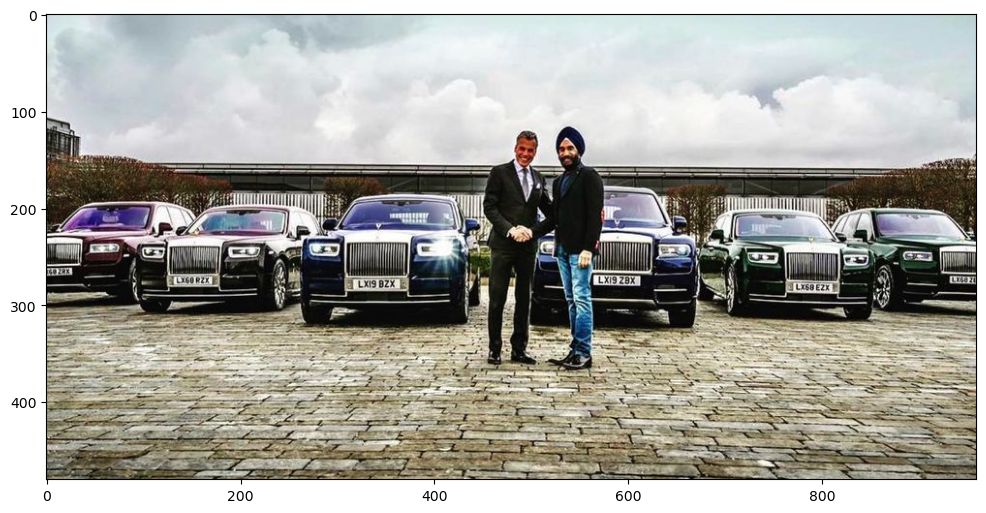

In [10]:
img = cv2.imread('./data/person_car.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
print('img_rgb shape:', img_rgb.shape)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)

## 2.1 pretrained 모델 가져오기

In [11]:
!mkdir ./pretrained

In [12]:
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2024-09-21 19:02:33--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 34.64.4.91, 34.64.4.27, 34.64.4.59, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|34.64.4.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  10.2MB/s    in 34s     

2024-09-21 19:03:08 (10.6 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2024-09-21 19:03:08--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [13]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [14]:
!pwd

/home/arclab/딥러닝_데이터


In [15]:
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

total 296076
23205576 drwxr-xr-x 3 arclab arclab      4096 Feb  2  2018 .
23205573 drwxrwxr-x 3 arclab arclab      4096 Sep 21 19:03 ..
23205578 -rw-r--r-- 1 arclab arclab        77 Feb  2  2018 checkpoint
23205585 -rw-r--r-- 1 arclab arclab 120549957 Feb  2  2018 frozen_inference_graph.pb
23205580 -rw-r--r-- 1 arclab arclab 176914228 Feb  2  2018 model.ckpt.data-00000-of-00001
23205577 -rw-r--r-- 1 arclab arclab     14460 Feb  2  2018 model.ckpt.index
23205581 -rw-r--r-- 1 arclab arclab   5675175 Feb  2  2018 model.ckpt.meta
23205579 -rw-r--r-- 1 arclab arclab      3240 Feb  2  2018 pipeline.config
23205582 drwxr-xr-x 3 arclab arclab      4096 Feb  2  2018 saved_model


## 2.2 OpenCV에서 모델 실행하기

In [16]:
#fastRCNN 모델
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     './pretrained/config_graph.pbtxt')

cv2.dnn.readNetFromTensorflow
- OpenCV의 딥러닝 모듈(dnn)을 사용하여 TensorFlow 모델 로드
- 사전 학습된 TensorFlow 모델을 읽어와 OpenCV에서 사용
  - frozen_inference_graph.pb: 사전 학습된 TensorFlow 모델의 가중치 및 구조를 포함한 파일.
  - config_graph.pbtxt: 해당 모델의 구성과 레이어 구조를 정의한 파일.

In [17]:
img.shape
rows = img.shape[0]
cols = img.shape[1]
draw_img = img.copy()

cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))
cv_out = cv_net.forward()   #출력물을 생성
print(cv_out.shape)
green_color =(0,255,0)
red_color = (0,0,255)

(1, 1, 100, 7)


In [18]:
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

person: 0.9986
person: 0.9911
car: 0.8986
car: 0.8941
car: 0.8712
car: 0.8397
truck: 0.6510
car: 0.5874
truck: 0.5056


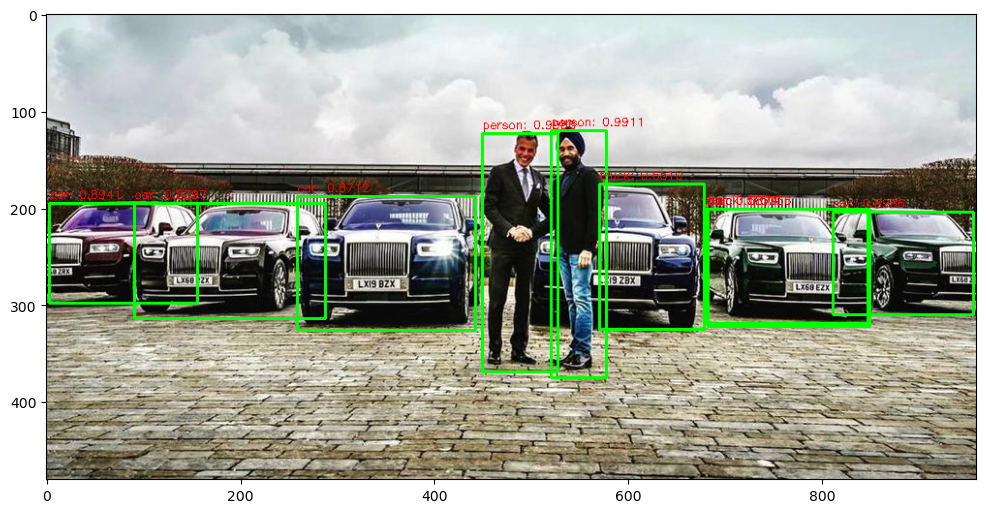

In [19]:
for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    if score > 0.5:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
        print(caption)
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## 2.3 실행시간 측정

In [21]:
import time
def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))
    start = time.time()
    cv_out = cv_net.forward()
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            print(caption)
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")
    return draw_img

image shape: (480, 960, 3)
person: 0.9986
person: 0.9911
car: 0.8986
car: 0.8941
car: 0.8712
car: 0.8397
truck: 0.6510
car: 0.5874
truck: 0.5056
Detection 수행시간: 0.36 초


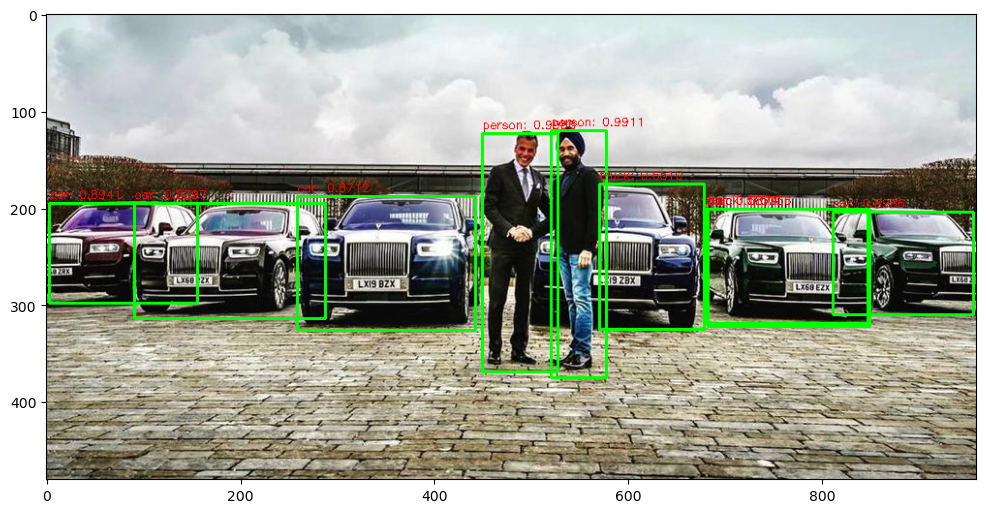

In [22]:
img = cv2.imread('./data/person_car.jpg')
print('image shape:', img.shape)
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     './pretrained/config_graph.pbtxt')
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## 3.1 동영상 가져오기

In [ ]:
%cp /content/drive/MyDrive/data/racing_trimmed.mp4 ./data

## 3.2 동영상 Detect

In [24]:
video_input_path = './data/racing_trimmed.mp4'
cap = cv2.VideoCapture(video_input_path)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 125


In [25]:
video_output_path ='./data/racing_output.mp4'
cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')  #이미지를 비디오로 출력

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS) # frame per second 초당 프레임수

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 125


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [26]:
green_color=(0, 255, 0)
red_color=(0, 0, 255)

while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    rows = img_frame.shape[0]
    cols = img_frame.shape[1]
    cv_net.setInput(cv2.dnn.blobFromImage(img_frame,  swapRB=True, crop=False))

    start= time.time()
    cv_out = cv_net.forward()
    frame_index = 0
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        if score > 0.5:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
    print('Detection 수행 시간:', round(time.time()-start, 2),'초')
    vid_writer.write(img_frame)
vid_writer.release()
cap.release()

Detection 수행 시간: 0.33 초
Detection 수행 시간: 0.32 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.32 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.32 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.29 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.31 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.3 초
Detection 수행 시간: 0.29 초
Detection 수행 시간

## 3.3 Detect 이미지 동영상 만들기

In [27]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    cap = cv2.VideoCapture(input_path)
    codec = cv2.VideoWriter_fourcc(*'XVID')
    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)
    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print=is_print)
        vid_writer.write(img_frame)
    vid_writer.release()
    cap.release()

In [28]:
do_detected_video(cv_net, './data/racing_trimmed.mp4', './data/racing_output.mp4', 0.2, False)

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


총 Frame 갯수: 125
person: 0.9787
book: 0.4374
book: 0.4074
book: 0.3307
tennis racket: 0.2715
person: 0.2282
person: 0.9786
motorcycle: 0.4610
baseball bat: 0.4074
bench: 0.2917
book: 0.2662
book: 0.2246
person: 0.9861
motorcycle: 0.4312
kite: 0.4170
book: 0.4074
person: 0.3623
book: 0.3510
person: 0.3225
book: 0.2879
person: 0.9603
kite: 0.5829
motorcycle: 0.3011
book: 0.2488
book: 0.2162
person: 0.9300
kite: 0.5434
person: 0.4681
book: 0.3297
motorcycle: 0.3170
book: 0.2898
person: 0.9789
kite: 0.8889
book: 0.3639
person: 0.3052
motorcycle: 0.2458
book: 0.2436
person: 0.9748
kite: 0.7067
motorcycle: 0.3956
book: 0.2982
person: 0.2335
car: 0.2134
person: 0.9732
kite: 0.4578
person: 0.3152
tennis racket: 0.3030
motorcycle: 0.2818
book: 0.2506
train: 0.2008
person: 0.9543
person: 0.6372
motorcycle: 0.5572
book: 0.4350
kite: 0.3966
person: 0.3656
bird: 0.2589
book: 0.2434
person: 0.9247
person: 0.8668
book: 0.4889
motorcycle: 0.4259
person: 0.3827
book: 0.3810
person: 0.3611
book: 0.2320
p

**관련 colab**

01_image_test.ipynb
- https://colab.research.google.com/drive/1l0TKSJx7wbfFqguu2_5UggFZGMvumYEA

02_tank.ipynb
- https://colab.research.google.com/drive/1elDQ05Tigl6eQ02kk3vuDKfpV28bXe_q

03_cnn.ipynb
- https://colab.research.google.com/drive/1Jg0odM3-KIdF8xzoJGrYPMvGrk5dKxtY

04_VOC_dataset.ipynb
- https://colab.research.google.com/drive/1o5W-n0JykEu8Khl4fM4nrUDN3BQB8ENX

05_fasterRCNN.ipynb
- https://colab.research.google.com/drive/15MGaa5PM194PxOWSApR_mKH_VuZZPqLC

06_yolo_image_trim.ipynb
- https://colab.research.google.com/drive/1h9O7EuitbqNAvyxRgw2jsN9goOR_z6di#scrollTo=H5lJcQYBJfOY

07_yolo_test.ipynb
- https://colab.research.google.com/drive/149gJbZC42UmzTE8SFZeyjXJXGwhllFix#scrollTo=vfGHEu4w1byT&uniqifier=2

08_yolo_train.ipynb
- https://colab.research.google.com/drive/1PEK1xqBgopBR1D-iZm1XO6qIkPj3MnhE#scrollTo=CX-7-n6O2EYH

09_yolo_tank_train.ipynb
- https://colab.research.google.com/drive/1c-MztnuuzCZ826lMbjaZn0AWq7nkePTo#scrollTo=F8dogithgZtS